1stFlrSF - first floor square feet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
PATH='../data/'
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'test.csv')

col = '1stFlrSF'
col_train = train[col]
col_test = test[col]

In [3]:
train[col].dtype

dtype('int64')

In [4]:
col_train.nunique()

753

In [16]:
df_na = train.isnull().sum()
df_na[df_na>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [5]:
col_train.isnull().sum()

0

In [12]:
col_train[col_train==0]
# no houses has 0 1stFlrSF

Series([], Name: 1stFlrSF, dtype: int64)

In [10]:
col_train.value_counts(dropna=False)

864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
764      6
990      6
728      6
1056     6
840      6
882      6
1728     6
720      6
796      5
1494     5
1422     5
520      5
1072     5
1080     5
616      5
798      5
1236     5
958      5
        ..
1223     1
1225     1
1229     1
1235     1
1238     1
1240     1
1241     1
1242     1
1090     1
1244     1
1247     1
1248     1
1249     1
1251     1
1256     1
1260     1
1261     1
1265     1
1272     1
1274     1
1279     1
1281     1
1282     1
1283     1
1284     1
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

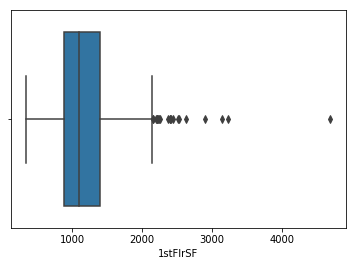

In [6]:
sns.boxplot(col_train)

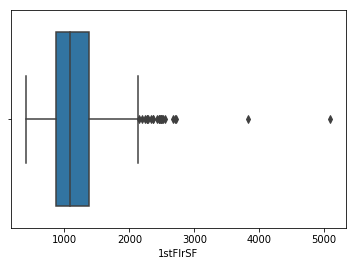

In [7]:
sns.boxplot(col_test)

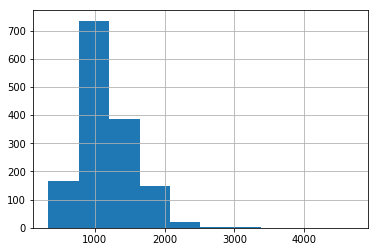

In [8]:
col_train.hist()

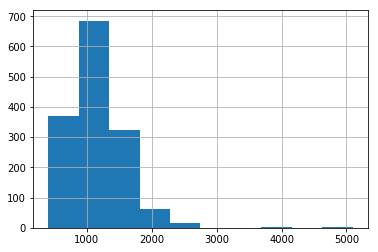

In [9]:
col_test.hist()

### SalePrice according to MSSubClass

In [30]:
cols = ['MSSubClass', 'SalePrice']
aggr = {
    'SalePrice': {
        'avg_price': 'mean'
    }
}
groupby = train[cols].groupby('MSSubClass').mean()
groupby.sort_values('SalePrice')

,SalePrice
MSSubClass,
30,95829.724638
180,102300.000000
45,108591.666667
190,129613.333333
90,133541.076923
160,138647.380952
50,143302.972222
85,147810.000000
40,156125.000000


### Write a transformer to one-hot encode this feature

In [54]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
import category_encoders as ce

class MSSubClassTransformer(TransformerMixin):
    """
    one-hot encoded this feature because it is categorical
    instead of recognize it as an int feature
    """
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        col = 'MSSubClass'
        dummy = pd.get_dummies(X[col], prefix=col)
        drop_col = X.drop(col, axis=1)
        df = pd.concat([dummy, drop_col], axis=1)
        return df
        
# test
pipe = Pipeline([
    ('transformer', MSSubClassTransformer())
])
transformed = pipe.transform(train[cols])
transformed.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,SalePrice
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,208500
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,181500
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,223500
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,140000
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,250000


not using ColumnTransformer from sklearn.compose because it does not return dataframe but ndarray